<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time series aggregation


---

### Learning Objectives

- "Rolling" statistics through time, such as the rolling mean
- Exponentially weighted statistics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id="load-the-unemployment-data"></a>
<a id="load-the-unemployment-data"></a>
## Load the Unemployment Data
---

This is historical quarterly data regarding unemployment rates in the United States. First, perform any necessary cleaning.

In [27]:
data = pd.read_csv('../../../../resource-datasets/unemployment_timeseries/seasonally-adjusted-quarterly-us.csv')

In [28]:
data.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [29]:
data.dropna(inplace=True)

### Rename the columns

Shorter names than the original ones could be good.

In [30]:
data.rename(columns={'Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993':'Unemployment'}, inplace=True)

### Clean the unemployment rate column

Remove the percentage sign and transform to float.

In [31]:
data.Unemployment = data.Unemployment.str.replace('%','').astype(float)
data.dtypes

Quarter          object
Unemployment    float64
dtype: object

## Create a Datetime Index
---

This is quarterly data, so converting to datetime is a bit complicated.

- First transform the column with the yearly quarters to datetime.
- Then use `.dt.to_period('Q')` to represent the string as a datetime object.
- Finally, set this datetime column as the index.

In [33]:
data.Quarter = pd.to_datetime(data.Quarter).dt.to_period('Q')
data.dtypes

Quarter         period[Q-DEC]
Unemployment          float64
dtype: object

In [34]:
data.set_index('Quarter',inplace=True)
data.head()

,Unemployment
Quarter,
1948Q1,3.733
1948Q2,3.667
1948Q3,3.767
1948Q4,3.833
1949Q1,4.667


## Visually Examine the Unemployment Rate
---

Plot the unemployment rate.

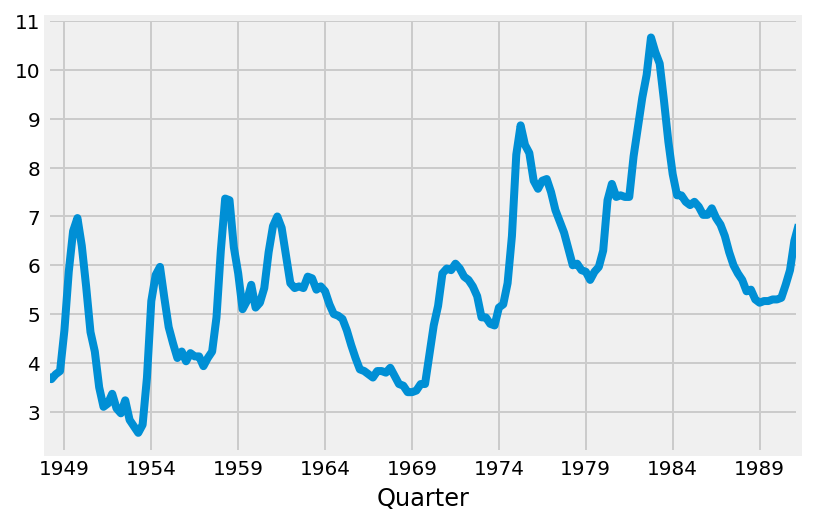

In [35]:
data.Unemployment.plot();

<a id="rolling-functions"></a>
<a id="rolling-functions"></a>
## "Rolling" Functions
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of functionalities for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.

<a id="parameters-for-rolling-functions"></a>
<a id="parameters-for-rolling-functions"></a>
### Parameters for `rolling()` Functions

**`rolling().mean()`** (as well as **`rolling().median()`**) can take the following parameters:

- The first indicates the time series to aggregate.
- **`window`** indicates the number of datapoints to include in the aggregation.
- **`center`** indicates whether the window should be centered on the date or use data prior to that date.


> **Note:** For more information, see Pandas' [rolling documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html?highlight=rolling#pandas.DataFrame.rolling).

#### Using a window spanning a year and the mean for aggregation. Plot and compare to the original time series.

In [54]:
yearly = pd.DataFrame({'Yr_MA':data.Unemployment.rolling(window=4).mean()},
                      index=data.index.to_timestamp().year)
yearly.rename(index={'Quarter':'Year'}, inplace=True)
yearly.head()

,Yr_MA
Quarter,
1948,NaN
1948,NaN
1948,NaN
1948,NaN
1949,NaN


**Extract the dates from the index as timestamps.**

> *Hint: The `.to_timestamp()` function allows you to extract the timestamps.*

In [37]:
data.head()

,Unemployment,Yr_MA
Quarter,,
1948Q1,3.733,NaN
1948Q2,3.667,NaN
1948Q3,3.767,NaN
1948Q4,3.833,3.7500
1949Q1,4.667,3.9835


In [22]:
date_ticks_orig = data.index.to_timestamp()
date_ticks_roll = yearly.index.to_timestamp()

AttributeError: 'Index' object has no attribute 'to_timestamp'

#### Use matplotlib to plot your time series.

- Choose the time series as y-values and the timestamp-indices extracted in the last part as x-values.
- Plot both, the original timeseries and the one averaged over the windows.

In [ ]:
plt.plot(x=date_ticks_orig, y=data.Unemployment, c='b');
plt.plot(x=date_ticks_orig, y=data.1yr_MA, c='r');

#### Calculate the rolling mean of years with `window=3`  without centering.

#### Calculate the rolling median with `window=5` and `window=15`. Plot both together.

## The Expanding Mean
---

The "expanding mean" uses all data points up to the current time to calculate the mean, as opposed to a moving window.

#### Calculate and plot the expanding mean below. 

Use 

`data.unemployment_rate.expanding().mean()`.

<a id="exponentially-weighted-windows"></a>
<a id="exponentially-weighted-windows"></a>
## Exponentially Weighted Windows
---

Exponentially weighted windows are one of the most common and effective ways of averaging out noise in time series data. The averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of time points that are further in the past.

The (adjusted) exponentially weighted mean for time $t$, is defined as:

$$ y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-2} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

> **Note:** Review Pandas' [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html?highlight=ewm#pandas.DataFrame.ewm) for more information.

#### Calculate and plot the exponentially weighted mean along with the rolling mean. What is the difference?

For example: `.ewm(alpha=0.1).mean()`.

- Find out what `alpha` does.